<a href="https://colab.research.google.com/github/hyeonukim/DataProcessing_ImageHandling/blob/main/How_to_handle_Data%2C_and_Images(12)_More_Contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## More on Contours

In [3]:
from google.colab import files
uploaded = files.upload()

Saving digits.png to digits.png


## OpenCV Contour Rectangle
**cv2.boundingRect(contour)**: Draw a rectangle that includes the Contour
  - returns x,y coordinates, and width, height of the rectangle


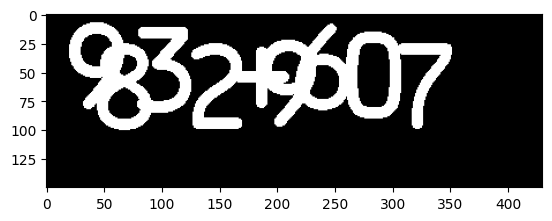

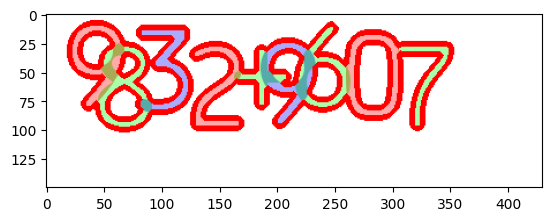

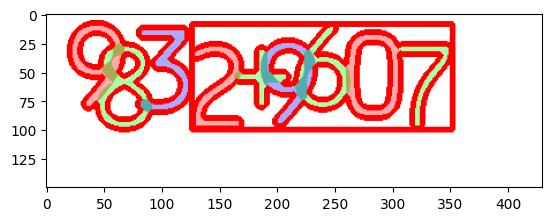

In [9]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digits.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# thresholding so that if any pixel value is bigger than 230, make it 255
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
# draw all the contours found on the image
image = cv2.drawContours(image, contours, -1, (0,0,255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# get first index of the contour
contour = contours[0]
x,y,w,h = cv2.boundingRect(contour)
# draw a rectangle around first contour
image = cv2.rectangle(image, (x,y), (x+w, y+h), (0,0,255), 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()



## OpenCV Contour's Convex Hull

**cv2.convexHull(contour)**: finds the convex hull of a 2D point set using algorithm.

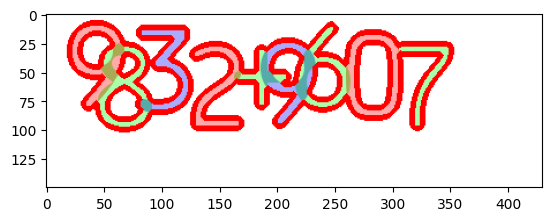

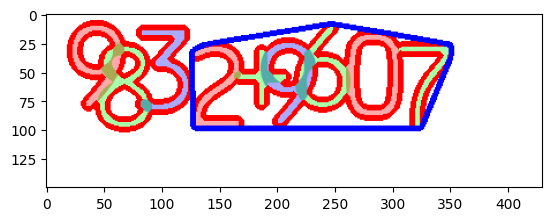

In [11]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digits.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# thresholding so that if any pixel value is bigger than 230, make it 255
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# get first index of the contour
contour = contours[0]
# draw a convex hull around first contour
hull = cv2.convexHull(contour)
image = cv2.drawContours(image, [hull], -1, (255, 0, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## OpenCV Contour Polynomial

**cv2.approxPolyDP(curve, epsilon, closed)**: approximates a curve or polygon with naother curve/polygon with less vertices so that the distance between them is less or equal to the specified precision.
- curve: Input vector of a 2D point
- epsilon: 	Parameter specifying the approximation accuracy. This is the maximum distance between the original curve and its approximation.
- closed: If true, the approximated curve is closed

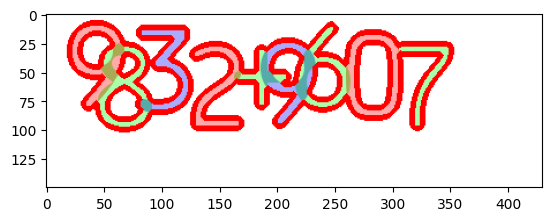

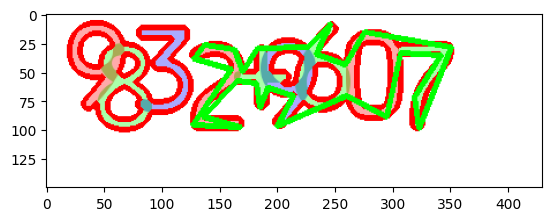

In [15]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digits.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# thresholding so that if any pixel value is bigger than 230, make it 255
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
# when we decrease the epsilon value, it becomes more closer to contour
# when we increase the epsilon value, it becomes more approximate
# you can edit the constant 0.01 to either 0.1 or 0.0001 to see the result
epsilon = 0.01 * cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, epsilon, True)
image = cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## Computing area of contour
- **cv2.contourArea(contour)**: computes the area of contour
- **cv2.arcLength(contour)**: computes the perimetre of contour
- **cv2.moments(contour)**: computes moments

Area: 9637.5
Length: 1112.1046812534332
M: {'m00': 9637.5, 'm10': 2328654.1666666665, 'm01': 525860.6666666666, 'm20': 592439950.25, 'm11': 125395340.54166666, 'm02': 32616659.75, 'm30': 157199366984.05002, 'm21': 31597487112.5, 'm12': 7677332730.433333, 'm03': 2223038890.5, 'mu20': 29780523.227014065, 'mu11': -1665373.5978347063, 'mu02': 3923591.96819859, 'mu30': -339915780.7390442, 'mu21': 76375946.41720533, 'mu12': -21905836.49518633, 'mu03': 15169233.760740757, 'nu20': 0.3206295471760697, 'nu11': -0.01793010748946005, 'nu02': 0.04224302932750429, 'nu30': -0.03727866486560947, 'nu21': 0.008376172780476334, 'nu12': -0.0024024196097321344, 'nu03': 0.001663614382378067}


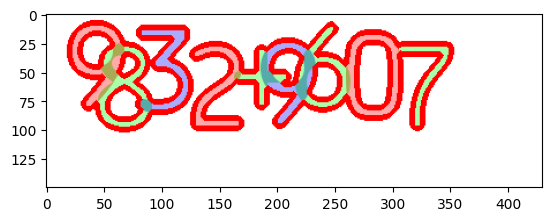

In [16]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digits.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# thresholding so that if any pixel value is bigger than 230, make it 255
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

contour = contours[0]
area = cv2.contourArea(contour)
print("Area:", area)

length = cv2.arcLength(contour, True)
print("Length:", length)

M = cv2.moments(contour)
print("M:", M)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()